In [43]:
# Importing modules needed for data analysis.
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
from scipy import signal as ss
from scipy import constants as cs
from pylab import *
import glob

In [44]:
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/BandGap'+path+'.txt'
    path = path.replace(" ", "%20")
    return path



In [45]:
%%capture --no-display
#Read in data from gitlab

Si20 = np.array([pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si10 = np.array([pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si0 = np.array([pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_10 = np.array([pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_20 = np.array([pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])

#cuts made due to over-ranging picoammeter
v = 100
v20 = -88
v10 = -41
v0 = -2
v_10 = -67
v_20 = -60

Ge20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][v:v20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][v:v20]])
Ge10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[0][v:v10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[1][v:v10]])
Ge0 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][v:v0]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][v:v0]])
Ge_10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[0][v:v_10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[1][v:v_10]])
Ge_20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[0][v:v_20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[1][v:v_20]])



In [46]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(k*T))-1)


In [47]:
def fit(dat,temp):
    data = RealData(dat[1], dat[0], sx= 0.01*dat[1], sy=0.05*dat[0])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp], ifixb=[1,0] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [48]:
ls,odr = fit(Si0,273)

print(odr)

[array([2.56565552e-12, 2.73000000e+02]), array([9.51437613e-14, 0.00000000e+00])]


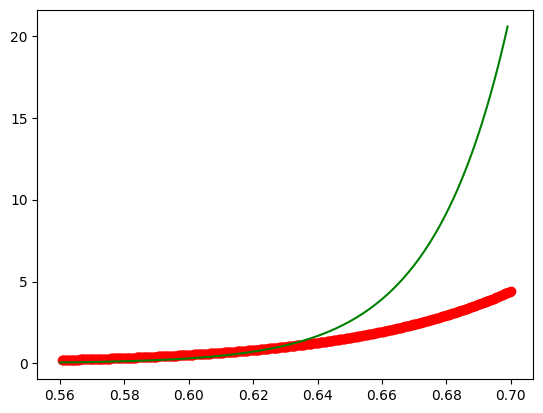

In [49]:
x = np.arange(0.56,0.7,.001)
y = current(odr[0],x)

plot(Si0[1],Si0[0],'ro')

plot(x,y,'g-',label='odr')

In [50]:

a,odrSi20 = fit(Si20,293)
a,odrSi10 = fit(Si10,283)
a,odrSi0 = fit(Si0,273)
a,odrSi_10 = fit(Si_10,263)
a,odrSi_20 = fit(Si_20,253)

a,odrGe20 = fit(Ge20,293)
a,odrGe10 = fit(Ge10,283)
a,odrGe0 = fit(Ge0,273)
a,odrGe_10 = fit(Ge_10,263)
a,odrGe_20 = fit(Ge_20,253)




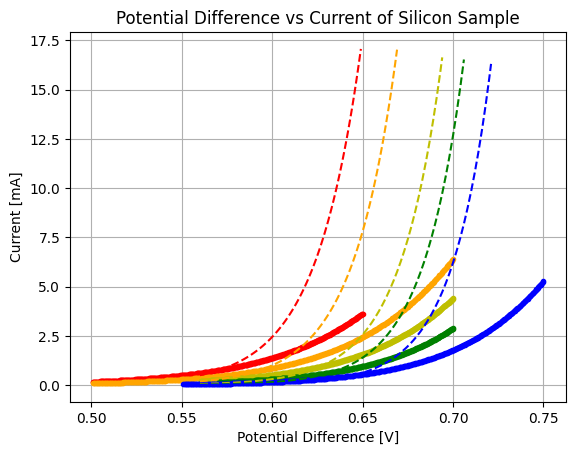

In [51]:

fig, ax = plt.subplots()
plt.plot(Si20[1],Si20[0],'r.')
plt.plot(Si10[1],Si10[0],color='orange',marker='.')
plt.plot(Si0[1],Si0[0],'y.')
plt.plot(Si_10[1],Si_10[0],'g.')
plt.plot(Si_20[1],Si_20[0],'b.')

x = np.arange(0.56,0.65,0.001)
plt.plot(x,current(odrSi20[0],x),'r--',label='odr')
x = np.arange(0.56,0.67,0.001)
plt.plot(x,current(odrSi10[0],x),'--', color='orange', label='odr')
x = np.arange(0.56,0.695,0.001)
plt.plot(x,current(odrSi0[0],x),'y--',label='odr')
x = np.arange(0.56,0.707,0.001)
plt.plot(x,current(odrSi_10[0],x),'g--',label='odr')
x = np.arange(0.56,0.7213,0.001)
plt.plot(x,current(odrSi_20[0],x),'b--',label='odr')
ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Silicon Sample')
ax.grid()


plt.savefig("SI_ivA.png", format="png", dpi=1000)

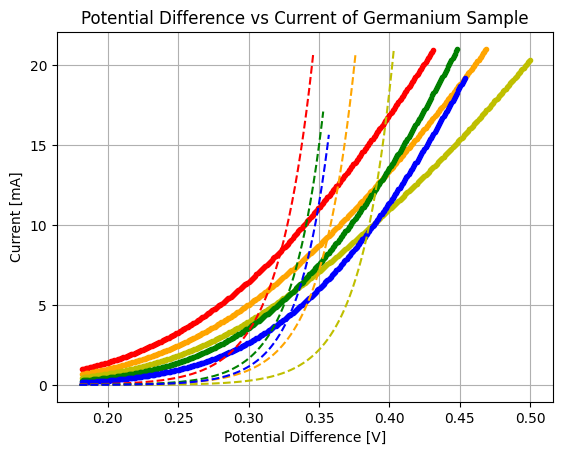

In [52]:
#x = np.arange(0,0.8,.001)
y = current(odr[0],x)


fig, ax = plt.subplots()
ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Germanium Sample')
ax.grid()

plt.plot(Ge20[1],Ge20[0],'r.')
plt.plot(Ge10[1],Ge10[0],color='orange',marker='.')
plt.plot(Ge0[1],Ge0[0],'y.')
plt.plot(Ge_10[1],Ge_10[0],'g.')
plt.plot(Ge_20[1],Ge_20[0],'b.')



x = np.arange(0.18,0.347,0.001)
plt.plot(x,current(odrGe20[0],x),'r--',label='odr')
x = np.arange(0.18,0.377,0.001)
plt.plot(x,current(odrGe10[0],x),'--', color='orange', label='odr')
x = np.arange(0.18,0.403,0.001)
plt.plot(x,current(odrGe0[0],x),'y--',label='odr')
x = np.arange(0.18,0.354,0.001)
plt.plot(x,current(odrGe_10[0],x),'g--',label='odr')
x = np.arange(0.18,0.358,0.001)
plt.plot(x,current(odrGe_20[0],x),'b--',label='odr')


plt.savefig("Ge_ivA.png", format="png", dpi=1000)

In [53]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)

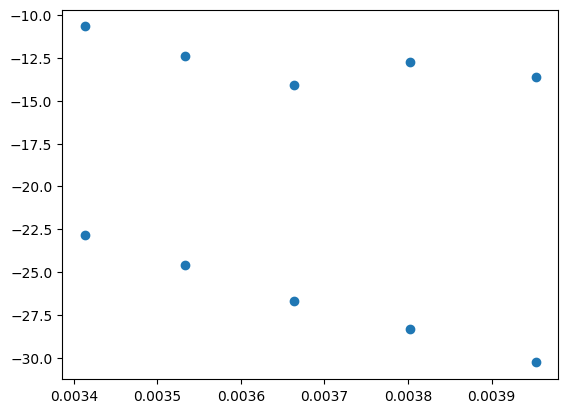

In [54]:
plt.scatter(x,y)

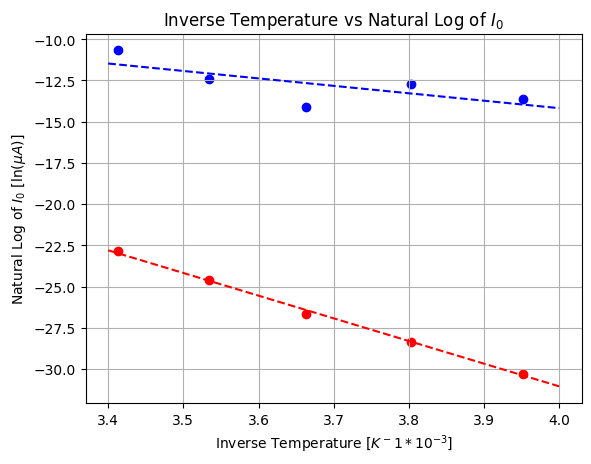

In [55]:
def lin(x,m,b):
    return m*x+b

p1, C1 = curve_fit(lin, x[0:5], y[0:5])
sigp = np.sqrt(np.diag(C1))
mSi = p1[0]
bSi = p1[1]

p2, C2 = curve_fit(lin, x[5:], y[5:])
sigp = np.sqrt(np.diag(C2))
mGe = p2[0]
bGe = p2[1]

fig, ax = plt.subplots()
ax.set(xlabel='Inverse Temperature [$K^-1 * 10^{-3}$]', ylabel='Natural Log of $I_0$ [$\ln(\mu A)$]',
       title='Inverse Temperature vs Natural Log of $I_0$')
ax.grid()
plt.scatter(x[0:5]*10**3,y[0:5], color='red')
plt.scatter(x[5:]*10**3,y[5:], color='blue')
ran = np.arange(0.0034,0.004,0.0001)
plt.plot(ran*10**3,lin(ran,mSi,bSi), '--', color='red')
plt.plot(ran*10**3,lin(ran,mGe,bGe), '--', color='blue')


plt.savefig("resultsA.png", format="png", dpi=1000)

In [56]:
k = cs.physical_constants['Boltzmann constant in eV/K'][0] #eV/K
print(-mSi*k)
print(-mGe*k)

1.1850430635153286
0.3888171534558576


In [57]:
# Alternative model, Non-ideal Diode

def current(beta, V):
    I_0,T,n = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(n*k*T))-1)

In [16]:
def fit(dat,temp):
    data = RealData(dat[1], dat[0], sx= 0.01*dat[1], sy=0.05*dat[0])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp,1], ifixb=[1,0,1] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [17]:

a,odrSi20 = fit(Si20,293)
a,odrSi10 = fit(Si10,283)
a,odrSi0 = fit(Si0,273)
a,odrSi_10 = fit(Si_10,263)
a,odrSi_20 = fit(Si_20,253)

a,odrGe20 = fit(Ge20,293)
a,odrGe10 = fit(Ge10,283)
a,odrGe0 = fit(Ge0,273)
a,odrGe_10 = fit(Ge_10,263)
a,odrGe_20 = fit(Ge_20,253)

In [18]:
ls,odr = fit(Si0,273)

print(odr)

[array([9.89146578e-07, 2.73000000e+02, 1.93753565e+00]), array([1.33459818e-08, 0.00000000e+00, 1.90045603e-03])]


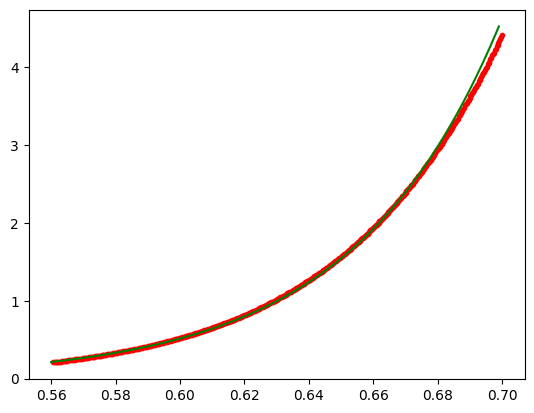

In [19]:
x = np.arange(0.56,0.7,.001)
y = current(odr[0],x)

plot(Si0[1],Si0[0],'r.')

plot(x,y,'g-',label='odr')

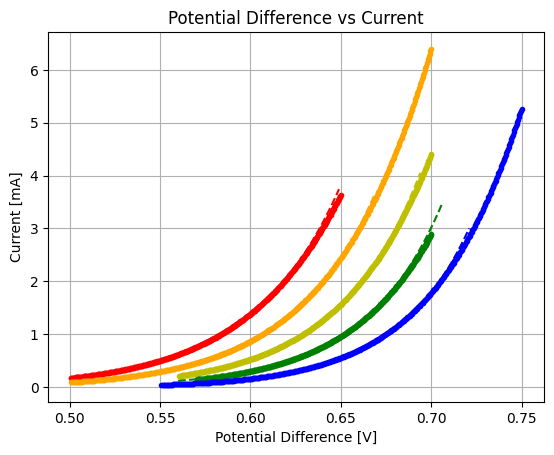

In [20]:
fig, ax = plt.subplots()
ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current')
ax.grid()

plt.plot(Si20[1],Si20[0],'r.')
plt.plot(Si10[1],Si10[0],color='orange',marker='.')
plt.plot(Si0[1],Si0[0],'y.')
plt.plot(Si_10[1],Si_10[0],'g.')
plt.plot(Si_20[1],Si_20[0],'b.')

x = np.arange(0.56,0.65,0.001)
plt.plot(x,current(odrSi20[0],x),'r--',label='odr')
x = np.arange(0.56,0.67,0.001)
plt.plot(x,current(odrSi10[0],x),'--', color='orange', label='odr')
x = np.arange(0.56,0.695,0.001)
plt.plot(x,current(odrSi0[0],x),'y--',label='odr')
x = np.arange(0.56,0.707,0.001)
plt.plot(x,current(odrSi_10[0],x),'g--',label='odr')
x = np.arange(0.56,0.7213,0.001)
plt.plot(x,current(odrSi_20[0],x),'b--',label='odr')

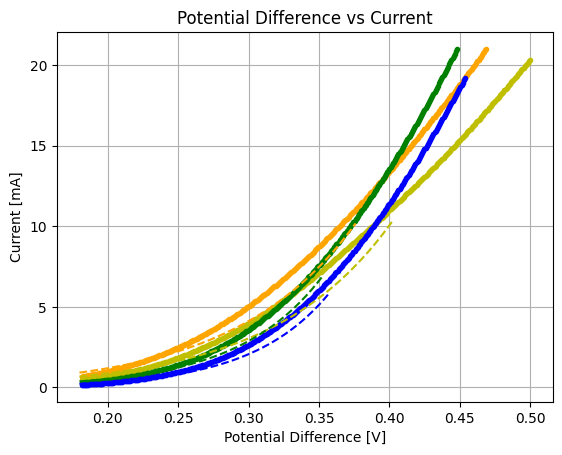

In [21]:
#x = np.arange(0,0.8,.001)
y = current(odr[0],x)

fig, ax = plt.subplots()
ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current')
ax.grid()

#plt.plot(Ge20[1],Ge20[0],'r.')
plt.plot(Ge10[1],Ge10[0],color='orange',marker='.')
plt.plot(Ge0[1],Ge0[0],'y.')
plt.plot(Ge_10[1],Ge_10[0],'g.')
plt.plot(Ge_20[1],Ge_20[0],'b.')



#x = np.arange(0.18,0.347,0.001)
#plt.plot(x,current(odrGe20[0],x),'r--',label='odr')
x = np.arange(0.18,0.377,0.001)
plt.plot(x,current(odrGe10[0],x),'--', color='orange', label='odr')
x = np.arange(0.18,0.403,0.001)
plt.plot(x,current(odrGe0[0],x),'y--',label='odr')
x = np.arange(0.18,0.354,0.001)
plt.plot(x,current(odrGe_10[0],x),'g--',label='odr')
x = np.arange(0.18,0.358,0.001)
plt.plot(x,current(odrGe_20[0],x),'b--',label='odr')

In [22]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)


/tmp/ipykernel_76481/237760324.py:6: RuntimeWarning: invalid value encountered in log
  y = np.log(I_0)


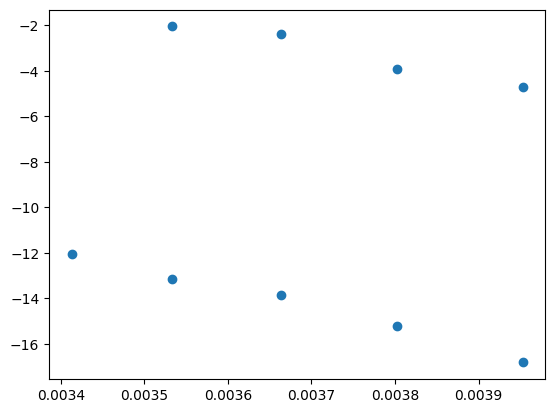

In [23]:
plt.scatter(x,y)

In [24]:
def lin(x,m,b):
    return m*x+b

p1, C1 = curve_fit(lin, x[0:5], y[0:5])
sigp = np.sqrt(np.diag(C1))
mSi = p1[0]
bSi = p1[1]

p2, C2 = curve_fit(lin, x[6:], y[6:])
sigp = np.sqrt(np.diag(C2))
mGe = p2[0]
bGe = p2[1]



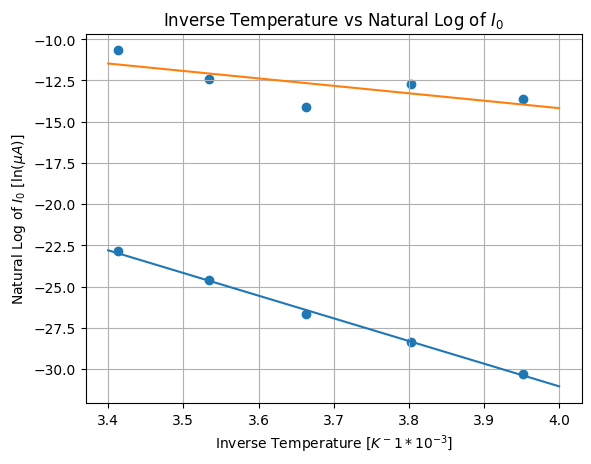

In [58]:
fig, ax = plt.subplots()
ax.set(xlabel='Inverse Temperature [$K^-1 * 10^{-3}$]', ylabel='Natural Log of $I_0$ [$\ln(\mu A)$]',
       title='Inverse Temperature vs Natural Log of $I_0$')
ax.grid()

plt.scatter(x*10**3,y)
ran = np.arange(0.0034,0.004,0.0001)
plt.plot(ran*10**3,lin(ran,mSi,bSi))
plt.plot(ran*10**3,lin(ran,mGe,bGe))

In [26]:
k = cs.physical_constants['Boltzmann constant in eV/K'][0] #eV/K
print(-mSi*k)
print(-mGe*k)


0.7438607478883931
0.5888060949647103


In [29]:
print(odrSi20)
print(odrSi10)
print(odrSi0)
print(odrSi_10)
print(odrSi_20)

[array([5.87535182e-06, 2.93000000e+02, 1.92329602e+00]), array([7.55857350e-08, 0.00000000e+00, 2.10277217e-03])]
[array([1.95985734e-06, 2.83000000e+02, 1.89954859e+00]), array([4.15758928e-08, 0.00000000e+00, 3.14523064e-03])]
[array([9.89146578e-07, 2.73000000e+02, 1.93753565e+00]), array([1.33459818e-08, 0.00000000e+00, 1.90045603e-03])]
[array([2.49476720e-07, 2.63000000e+02, 1.89404045e+00]), array([3.86365147e-09, 0.00000000e+00, 1.99107102e-03])]
[array([5.00184923e-08, 2.53000000e+02, 1.84650334e+00]), array([1.73193455e-09, 0.00000000e+00, 3.99926928e-03])]


In [30]:
print(odrGe20)
print(odrGe10)
print(odrGe0)
print(odrGe_10)
print(odrGe_20)

[array([-2.09932849e+00,  2.93000000e+02, -1.03825818e-01]), array([0.11421566, 0.        , 0.        ])]
[array([1.27553674e-01, 2.83000000e+02, 3.51089723e+00]), array([0.00476847, 0.        , 0.03420299])]
[array([9.22848828e-02, 2.73000000e+02, 3.61737532e+00]), array([0.00401886, 0.        , 0.0393497 ])]
[array([2.00074010e-02, 2.63000000e+02, 2.66076156e+00]), array([0.00083967, 0.        , 0.02197296])]
[array([8.89940694e-03, 2.53000000e+02, 2.52512870e+00]), array([0.00041923, 0.        , 0.02140475])]


In [ ]:

fig, ax = plt.subplots()
plt.plot(Si20[1],Si20[0],'r.',label='293K')
x = np.arange(0.5,0.65,0.001)
plt.plot(x,current(odrSi20[0],x),'--',color='darkred')

plt.plot(Si10[1],Si10[0],color='orange',ls='',marker='.',label='283K')
x = np.arange(0.5,0.67,0.001)
plt.plot(x,current(odrSi10[0],x),'--', color='darkorange')

plt.plot(Si0[1],Si0[0],'y.',label='273K')
x = np.arange(0.56,0.695,0.001)
plt.plot(x,current(odrSi0[0],x),'--', color='gold')

plt.plot(Si_10[1],Si_10[0],'g.',label='263K')
x = np.arange(0.56,0.707,0.001)
plt.plot(x,current(odrSi_10[0],x),'--', color='limegreen')

plt.plot(Si_20[1],Si_20[0],'b.',label='253K')
x = np.arange(0.56,0.7213,0.001)
plt.plot(x,current(odrSi_20[0],x),'--', color='cornflowerblue')

ax.axhline(-1,ls='--',color='k',label='Fit')

ax.set(xlabel='Potential Difference [V]', ylabel='Current [mA]',
       title='Potential Difference vs Current of Silicon Sample')
ax.grid()
ax.legend()


plt.ylim(0,15)

plt.savefig("SI_ivA.png", format="png", dpi=1000)